# Introduction to Regression

### Data Science 350
### Stephen F Elston

## Introduction

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explainatory variables** or **features**. Single regression has one label used to predict one feature. Multiple regression uses two of more feature variables. 

Virtually all machine learning models, including some of the latest deep learning methods, are a form of regression. There methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 

Linear regression is the foundational form of regression. In linear regression the squared error of the predictions of the dependent variable using the independent variable. This approach is know as the **method of least squares**.

## History

Regression is based on the method of least squares or the method of minimum mean square error. The ideas around least squares or averaging errors have occured over nearly three centruies. The fist known publication of a 'method of avergages' was by the German astronomer Tobias Mayer in 1750. Lapace used a similar method which he published in 1788.

![](img/TobiasMayer.jpg)

The first publication of the method or least squares was by the French mathematician Adrien-Marie Legendre in 1805. 

![](img/Legendre.jpg)
<center>**Caricature of Legendre**, published method of least squares</center>

It is very likely that the German physicist and mathematician Gauss developed the method of least squares as early as 1795, but did not publish the method until 1809, aside from a reference in a letter in 1799. Gauss never disputed Legendre's priority in publication. Legendre did not return the favor, and opposed any notion that Gauss had used the method earlier. 

![](img/Carl_Friedrich_Gauss.jpg)
<center>**Carl Friedrich Gauss**, early adoptor of least squares</center>

The first use of the term **regression** was by Francis Gaulton, a cousin of Charles Darwin, in 1886. Gaulton was interested in determining which traits of plants and animals, including humans, could be said to be inherited. 

<center>![](img/Francis_Galton.jpg)
**Francis Galton**, inventor of regression</center>

While Gaulton invented a modern form regression, it fell to Karl Pearson to put regression and multiple regression on a firm mathematical footing. Pearson's 1898 publication proposed a method of regression as we understand it today. 

Many others have expanded the theory of regression in the 120 years since Pearson's paper. Notably, Joseph Berkson published the logistic regression method in 1944, one of the first classification algorithms. In recent times the interest in machine learning has lead to a rapid increase in the numbers and types of regression models. 

## Introduction to Linear Regression

We will focus here on **linear models** which are foundational
- Derived with linear algebra
- Basis of many machine learning models
- Understanding linear models is basis for understanding behavior ofmany statistical and ML models
- Basis of time series models

### Linear model of a strait line

Let's have a look at the simplest case of a regression model for a straght line. If we have one feature and one label, there are some number of values pairs, ${x_i,y_i}$, we can define a line that best fits that data.  

![](img/ymxb.jpg)
<center>**Single regression model**</center>

$$where\\
slope = m = \frac{rise}{run} = \frac{\delta y}{\delta x}\\
and\\
y = b\ at\ x = 0$$


If we have a number of values pairs, ${x_i,y_i}$, we can write the equation for the line with the errors as:

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = error$$

We can visualize these errors as shown in the fiture below.

![](img/LSRegression.jpg)
<center>**Example of Least Squares Regression**</center>

We want to solve for $m$ and $b$ by minimizing the error, $\epsilon_i$. We call this **least sqares regression**.

$$min \Sigma_i \epsilon^2 = min \Sigma_i{ (y_i - (mx_i + b))^2}$$

There are lots of compuationally efficient algorithms for finding minimums of equations. 

### A first regresson model

Let's give regression a try. The code in the cell below computes data pairs along a straight line. Normally distributed noise is added to the data values. Run this code and examine the head of the data frame.

In [1]:
sim.data <- function(x1, y1, x2, y2, n, sd){
  error <- rnorm(n, mean = 0, sd = sd)
  data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = y1, to = y2, length.out = n) + error)
            )
}
reg.data = sim.data(0, 0, 10, 10, 50, 1)
head(reg.data)

x,y
0.0000000,-0.935153369
0.2040816,0.258547102
0.4081633,0.862927865
0.6122449,1.793983562
0.8163265,1.570269411
1.0204082,-0.006676154


Next, you can visualize these data by exectuting the code in the cell below. Notice that the points nearly fall on a stright line. 

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.3"Loading required package: ggplot2


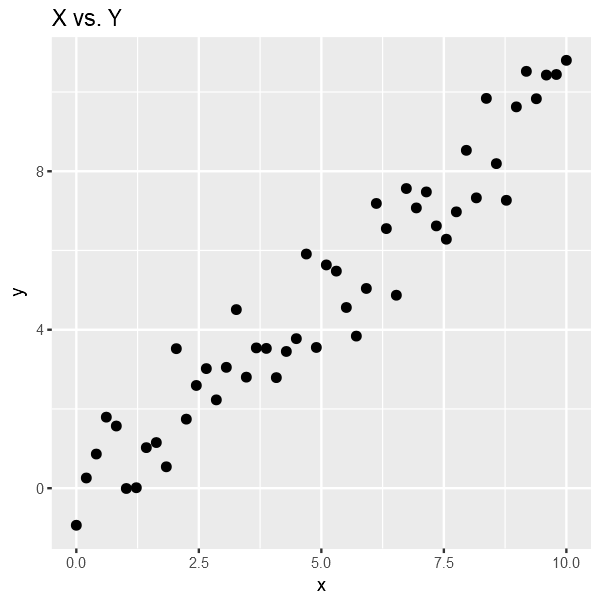

In [2]:
require(repr)
options(repr.plot.width=5, repr.plot.height=5)
plot.dat <- function(df){
  require(ggplot2)
  ggplot(df, aes(x, y)) + 
    geom_point(size = 2) +
    ggtitle('X vs. Y')
}
plot.dat(reg.data)

Now, you are ready to build and evaluate the model using R. R contains extensive linear modeling capabilities. Model definition in R using a powerful and flexible language to define the model. This modeling language was developed by John Chambers, Trevor Hastie, Rick Becker and others at AT&T Bell Labs in the late 1980's and early 1990's.

![](img/StatModS_.jpg)
<center>**Seminal book on stats modeling language, 1991**</center>

For a good [**cheatsheet and summary of the R modeling language**](http://faculty.chicagobooth.edu/richard.hahn/teaching/formulanotation.pdf) look at the posting by Richard Hahn of the Chicago Booth School. 

Models are defined by an equation using the $\sim$ symbol to mean modeled by. In summary, the variable to be modeled is always on the left. The relationship between the variabble to be modeled on the right. This basic scheme can be written as shown here. 

$$dependent\ variable\sim indepenent\ variables$$

For example, if the dependent variable (dv) is modeled by two independent variables (var1 and var2), with no interaction, the formula would be:

$$dv \sim var1 + var2$$

In our case we only have one independent variable and one dependent variable. The code in the cell below does the following:  

- Compute the R model object, `mod`, using the formula `y ~ x`.
- Use the model object to compute scores (predicted values) for the dependent variable `y`. In this case, we just use the data that was orriginally used to compute the model. In a more general case, you can use other data to make predictions from the model.
- The residuals of the model are computed.

Execute this code and examine the head of the data frame computed.

In [3]:
mod = lm(y ~ x, data = reg.data)
reg.data$score <- predict(mod, data = reg.data)
reg.data$resids <- reg.data$y - reg.data$score
head(reg.data)

x,y,score,resids
0.0000000,-0.935153369,-0.3227354,-0.6124180
0.2040816,0.258547102,-0.1101384,0.3686855
0.4081633,0.862927865,0.1024586,0.7604692
0.6122449,1.793983562,0.3150557,1.4789279
0.8163265,1.570269411,0.5276527,1.0426167
1.0204082,-0.006676154,0.7402497,-0.7469259


The code in the cell below is fairly volumonous, but straight forward. In summary, the code computes summary statistics and makes diagnostic plots for simple R linear models. Execute the code and examine plot of the predicted vs. actual values and the histogram of the residuals. 

Loading required package: gridExtra
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 470.618933292356 
SSR = 40.2883698268674 
SST = 510.907303119223 
RMSE = 9.80456111025742 
Adjusted R^2 = 0.917787887770509 
Intercept = -0.322735417786931 
Slope = 1.04172544042989 


Summary on R Model Object


Call:
lm(formula = y ~ x, data = reg.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7901 -0.7375  0.1040  0.6319  1.7196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.32274    0.25529  -1.264    0.212    
x            1.04173    0.04399  23.679   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9162 on 48 degrees of freedom
Multiple R-squared:  0.9211,	Adjusted R-squared:  0.9195 
F-statistic: 560.7 on 1 and 48 DF,  p-value: < 2.2e-16


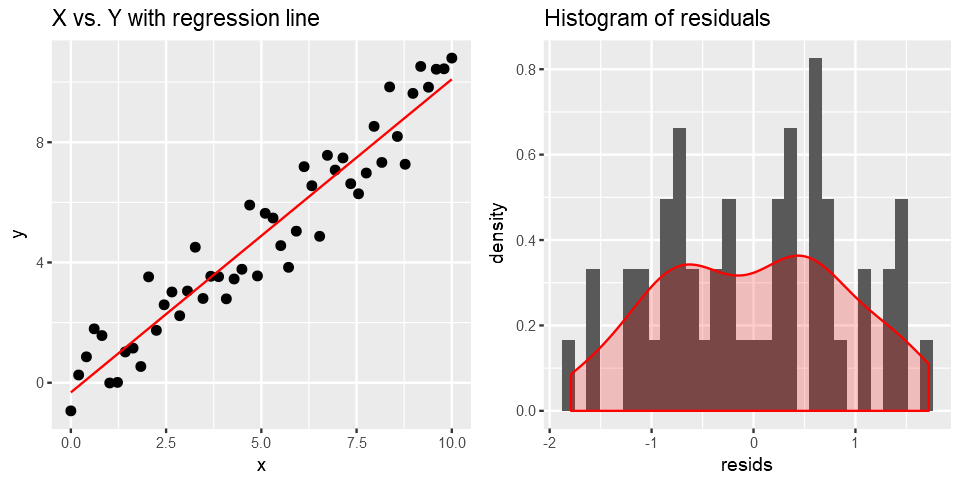

In [4]:
options(repr.plot.width=8, repr.plot.height=4)
plot.regression <- function(df, mod, x = 'x', y = 'y', k = 2, two.plot = TRUE){
  require(ggplot2)
  require(gridExtra)
  
  if(two.plot) {
      p1 <- ggplot(df, aes_string(x, y)) + 
            geom_point(size = 2) +
            geom_line(aes_string(x, 'score'), color = 'Red') + 
            ggtitle('X vs. Y with regression line')
      }
 
  p2 <- ggplot(df, aes(resids)) +
           geom_histogram(aes(y = ..density..)) +
           geom_density(color = 'red', fill = 'red', alpha = 0.2) +
           ggtitle('Histogram of residuals')
  
  if(two.plot) {grid.arrange(p1, p2, ncol = 2)}
  else{print(p2)}
  if(k > 2){plot(mod)}
  
  Ybar = mean(df$y)
  SST <- sum((df$y - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(nrow(df) - 2)), '\n'))
#  if(k == 1 | k == 2){
    n = nrow(df)
    adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
    cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
    cat(paste('Intercept =', as.character(mod$coefficients[1]), '\n'))
    cat(paste('Slope =', as.character(mod$coefficients[2]), '\n'))
#  } else {
      cat('\n')
      cat('\n')
      cat('Summary on R Model Object')
      summary(mod)
#  }
}
plot.regression(reg.data, mod)

**Your Turn:** Create a regression moodel from synthetic data with intercept of 0 and maximum value at ${x = 10, y = 10}$, and with a the error having a standard deviation of 5. Plot the result of your model. How does this slope and intercept of this model compare to the model from the data with a standard deviation of 1? **Hint:** You need need to add columns named `score` and `resids` to the data frame before you call the `plot.regression` function. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 346.356806469472 
SSR = 1282.95060758499 
SST = 1629.30741405446 
RMSE = 7.21576680144733 
Adjusted R^2 = 0.179071893417262 
Intercept = 1.15085223247324 
Slope = 0.893676702090313 


Summary on R Model Object


Call:
lm(formula = y ~ x, data = reg.data.5)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8570 -3.9625  0.1125  3.9554 10.9297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1509     1.4406   0.799 0.428305    
x             0.8937     0.2483   3.600 0.000752 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.17 on 48 degrees of freedom
Multiple R-squared:  0.2126,	Adjusted R-squared:  0.1962 
F-statistic: 12.96 on 1 and 48 DF,  p-value: 0.0007524


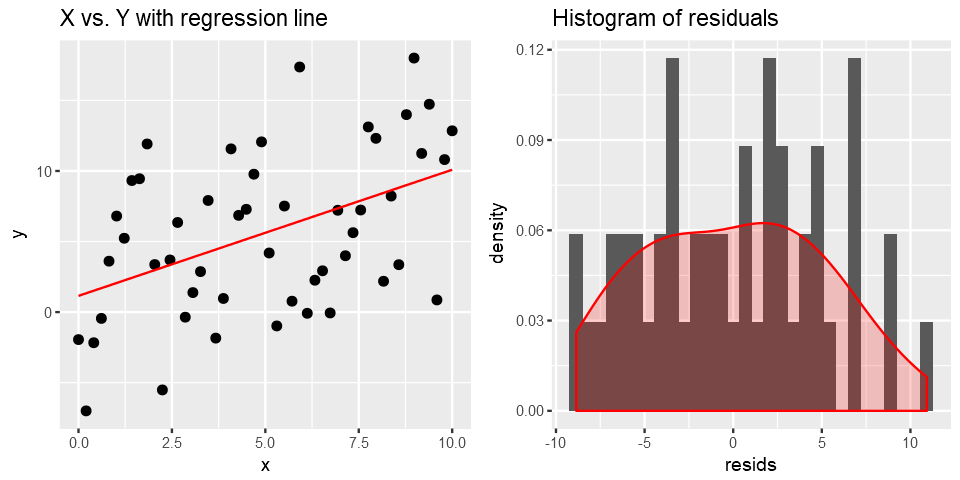

In [8]:
reg.data.5 = sim.data(0, 0, 10, 10, 50, 5)

mod.5 = lm(y ~ x, data = reg.data.5)
reg.data.5$score <- predict(mod.5, data = reg.data.5)
reg.data.5$resids <- reg.data.5$y - reg.data.5$score

plot.regression(reg.data.5, mod.5)

### Evaluation of regression models

Now that you have built a regression model, let's look at how you can quantitatively evaluate the performance of a regression model. The evaluation of regression models is based on measurements of the errors. The errors of a regression model can be visualized as shown in the figure below. 

![](img/Errors.jpg)

<center>**Measuring errors for a regression model**
$$Where\\
Y = [y_1, y_2, \ldots, y_n]\\
and\\
y_i = ith\ data\ value\\
\bar{Y} = mean(Y)\\
\\\hat{y_i} = regression\ estimate\ of\ y_i\\
SSE = sum\ square\ explained\ = \Sigma_i{(\hat{y_i} - \bar{Y})^2}\\
SSR = sum\ square\ residual\ = \Sigma_i{(y_i - \hat{y_i})^2}\\
SST = sum\ square\ total\ = \Sigma_i(y_i - \bar{Y})^2$$

The goal of regression is to minimize the residual error, $SSR$. Specifically we wish to explain the maximum amount of the variance in the original data as possible with our model. We can quantify this idea with coeficient of determination also known as $R^2$.

$$R^2 = 1 - \frac{SSR}{SST}\\
so\ as\\
SSR \rightarrow 0\\
R^2 \rightarrow 1$$

In words, $R^2$ is the fraction of the variance of the original data explained by the model. A model with perfectly explain the data has $R^2 = 1$. A model which does not explain the data at all has $R^2 = 0$.

However, there are two problems with $R^2$. </center>
 - $R^2$ is not bias adjusted for degrees of freedom.
 - More importantly, there is no adjustment for the number of model parameters. As the number of model parameters increases $SSR$ will generally decrease. Without an adjustment you will get a false sense of model performance.
 
To addresses these related issues, we can use adjusted $R^2$.

$$R^2_{adj} = 1 - \frac{\frac{SSR}{df_{SSR}}}{\frac{SST}{df_{SST}}} = 1 - \frac{var_{residual}}{var_{total}}\\
where\\
df_SSR = SSR\ degrees\ of\ fredom\\
df_SST = SST\ degrees\ of\ fredom$$

This gives $R^2_{adj}$ as:

$$R^2_{adj} = 1 - (1 - R^2) \frac{n - 1}{n - k}\\ 
where\\
n = number\ of\ data\ samples\\
k = number\ of\ model\ coeficients$$

Or, we can rewrite $R^2_{adj}$ as:

$$R^2_{adj} =  1.0 - \frac{SSR}{SST}  \frac{n - 1}{n - 1 - k}$$

Another measure of regression performance is root mean square error or $RMSE$:

$$RMSE = \sqrt{ \frac{\Sigma^n_{i-1} (y_i - \hat{y_i})^2}{n}} = \frac{\sqrt{SSR}}{n}$$

**Your Turn:** Examine the performance metrics for the previous two regressions. How do SSE, SSR, SST, $R^2$, and RMSE compare?

## Scaling Data

When performing regression with numeric variables you will almost **always scale the data**.  Scaling data is important not just for regression, but most other machine learning models. Some reasons to scale regression data include:

- The intercept may be a long way from the actual data. With scaled features, the intercept is at the centroid of the distribution. 
- Scaling prevents features with a large numerical range from overwhelming featuures with small numerical values. Numerical range is not an indicator of feature importance!

There are several possibile approaches to scaling data:
 - Scale the features or independent variables. This is the most common practice.
 - Scale the label or dependent variable.
 - Scale both, which is another common practice
 
In this case, we will just scale the one feature. Execute the code in the cell below and examine the results. 

In [9]:
reg.data$x.scale = scale(reg.data$x)
str(reg.data)

'data.frame':	50 obs. of  5 variables:
 $ x      : num  0 0.204 0.408 0.612 0.816 ...
 $ y      : num  -0.935 0.259 0.863 1.794 1.57 ...
 $ score  : num  -0.323 -0.11 0.102 0.315 0.528 ...
 $ resids : num  -0.612 0.369 0.76 1.479 1.043 ...
 $ x.scale: num [1:50, 1] -1.68 -1.61 -1.54 -1.47 -1.41 ...
  ..- attr(*, "scaled:center")= num 5
  ..- attr(*, "scaled:scale")= num 2.97


Notice that the new `x.scale` feature has some additional attributes. These attributes are used to scale new data on which you are making predicitons. This model **will not work on unscaled** data. 

Run the code in the cell below to create and evaluate a regression model using the scaled data. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 470.618933292356 
SSR = 40.2883698268674 
SST = 510.907303119223 
RMSE = 9.80456111025742 
Adjusted R^2 = 0.917787887770509 
Intercept = 4.88589178436251 
Slope = 3.09910761774654 


Summary on R Model Object


Call:
lm(formula = y ~ x.scale, data = reg.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7901 -0.7375  0.1040  0.6319  1.7196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.8859     0.1296   37.71   <2e-16 ***
x.scale       3.0991     0.1309   23.68   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9162 on 48 degrees of freedom
Multiple R-squared:  0.9211,	Adjusted R-squared:  0.9195 
F-statistic: 560.7 on 1 and 48 DF,  p-value: < 2.2e-16


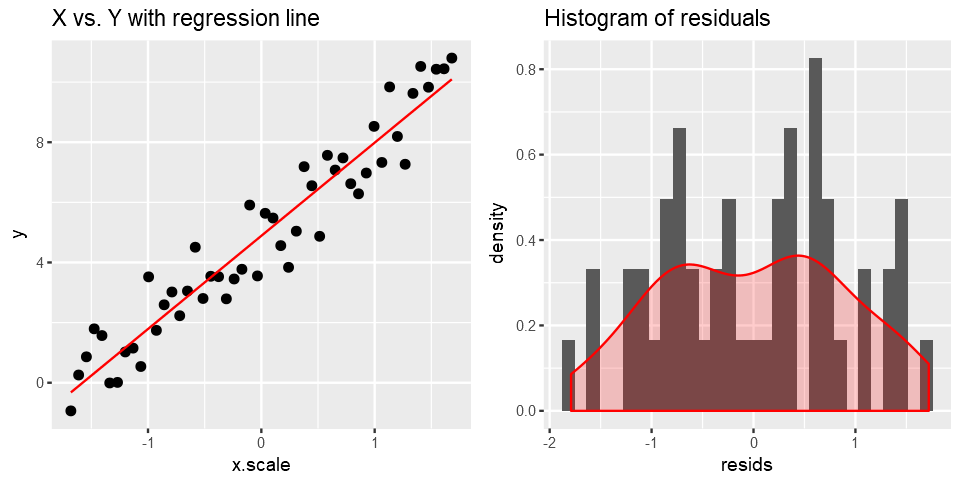

In [10]:
mod.scale = lm(y ~ x.scale, data = reg.data)
plot.regression(reg.data, x = 'x.scale', mod.scale)

Examine these results and compare them to the results for the unscaled regression. Which performance statistics are the same and which are different?

**Your Turn:** In the cell below use the data you created earlier to compute and evaluate a regression model using a scaled feature. Which performance metrics are the same and which are different.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


SSE = 346.356806469472 
SSR = 1282.95060758499 
SST = 1629.30741405446 
RMSE = 7.21576680144733 
Adjusted R^2 = 0.179071893417262 
Intercept = 5.61923574292481 
Slope = 2.65866625481256 


Summary on R Model Object


Call:
lm(formula = y ~ x.scale, data = reg.data.5)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8570 -3.9625  0.1125  3.9554 10.9297 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.6192     0.7311   7.686  6.6e-10 ***
x.scale       2.6587     0.7386   3.600 0.000752 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.17 on 48 degrees of freedom
Multiple R-squared:  0.2126,	Adjusted R-squared:  0.1962 
F-statistic: 12.96 on 1 and 48 DF,  p-value: 0.0007524


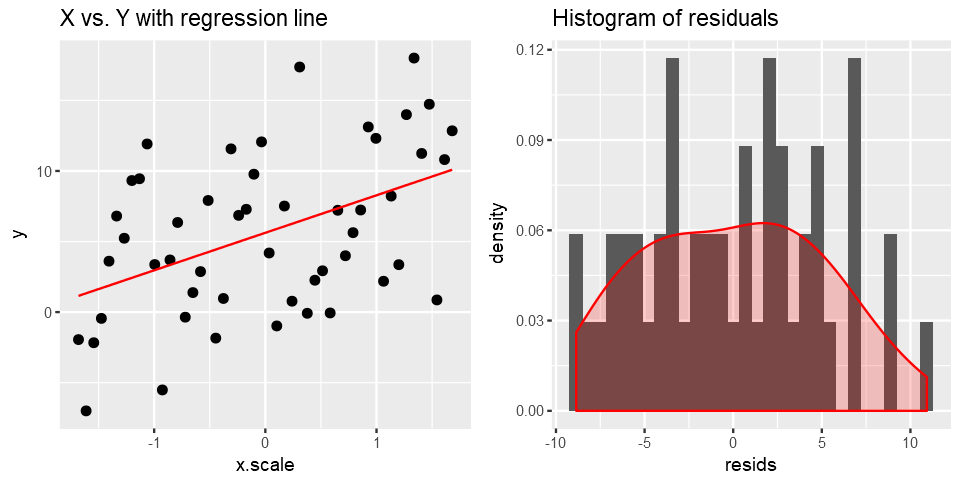

In [11]:
reg.data.5$x.scale = scale(reg.data.5$x)

mod.scale.5 = lm(y ~ x.scale, data = reg.data.5)
plot.regression(reg.data.5, x = 'x.scale', mod.scale.5)

## Linear regression assumptions

At this point we should discuss a few key assumtions of linear regression. Keep these points in mind whenever you used these models. 

- There is a **linear relationship** between dependent variable and the **coeficients** of the independent variables.
- Measurement error is independent and random. Technically, we say that the error is **independent identical distribution, or iid**.
- Errors arise from the dependent variable only.
- There is no multicolinearity. In other words, there is no significant correlation between the independent variables.
- Residuals are **homoscedastic** (constant variance).  In other words, the errors are the same across all groups of independent variables. The opposite of homoscedastic is **heteroscedastic**, where there is systematic variation in the residuals with label values.

The diagram below illustrates the iid errors for the dependent variable only.

![](img/IndependentErrors.jpg)

## Linear regressions are not just for strait lines

A linear model is linear in its coeficients, but that does not mean we are limited to straight lines, **a common misconception**.  In fact, a linear model need only be linear in its coeficients. A **non-comprehensive** list of functions which can be included in a linear model includes:

- Polynomials, but beware of polynomials of degree 3 or above.
- Splines and smoothing kernels.
- trigonometric functions.
- Logrithmic and expontential functions.
- Interaction terms, which are the product of feature values. For example, the two-way interaction of `var1` and `var2` is specified at `var1:var2`, or `var1*var2`. Adding a third variable, `var3` the three-way interaction, including all two-way interactions is modeled as `var1:var2:var3`. 

Clarify these concepts, let's look at an example. The code in the cell below computes a curved line using a second order polynomial with coeficients `c1 and c2` and adds Normally distributed noise.  Notice that the polynomial is defined by a linear sum of the components, defined by the coeficients. **Pay attention to the scaling of the features.** Run this code and have a look at the head of the data frame.

In [ ]:
sim.data.ploy <- function(x1, y1, x2, y2, c1 = 1.0, c2 = 0.5, n, sd){
  require(dplyr)
  error <- rnorm(n, mean = 0, sd = sd)
  df = data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = y1, to = y2, length.out = n))
            )
  df = df %>% mutate(y = c1 * y + c2 * y^2 + error)
  df$x = scale(df$x)
  df
}
reg.data.poly = sim.data.ploy(0, 0, 10, 10, n = 50, sd = 3)
head(reg.data.poly)

Next, you will compute a linear polynomial model for these data. The code in the  cell below uses the `I()` function which literally **Interprets** the argument. In this case `I(x^2)` is interpreted as the second order polynomial term. Run this code and examine the results. 

In [ ]:
mod.poly = lm(y ~ x + I(x^2), reg.data.poly)
reg.data.poly$score <- predict(mod.poly, data = reg.data.poly)
reg.data.poly$resids <- reg.data.poly$y - reg.data.poly$score
plot.regression(reg.data.poly, mod.poly, k = 3)

There is quite a bit of new information both plotted and in the tables. Let's step through what all this means.

- The plot of the data and the regression line. Look at this plot and try to decide if the fit is reasonably good.
- The histogram of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values (y in this case) vs. the residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values. 
- A Q-Q Normal plot of the residuals. Do these residuals appear to be close to Normally distributed?
- A plot of fitted values vs. the square root of the standardized residuals. Note the fitted smoothing regression line. Ideally, the distribution of residuals should not change with fitted values and should be in the range $0 \le \sqrt{stdresid} \le 1.5$ standard deviations. 
- The statistics we have already discussed.
- The report from the R `summary` method.
  - The model formula.
  - Summary statistics of the residuals.
  - For each model coeficient, 1) the value of the coeficient, 2) the standard error of the coeficient, 3) the t statistic for the coeficient, and 4) the p-value of the coeficient. The null hypothesis for the coeficient is that it is 0, and not contributing to the model.
  - The standard error of the residuals, defined as:
$$rse = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{df} = \frac{\Sigma^N_i(y_i - \hat{y_i})^2}{N - k}\\
where\\
k = number\ of\ model\ parameters
$$
  - $R^2$ and $R^2_{adj}$.
  - The F statistic and p-value for the model. The null hypthesis is that the model is not explaining the data, or that the distribution of residuals is the same as the distribution of the original data. 
- A leverage plot showing cooks distance. More on this latter.

**Your Turn:** Compute a linear model using a straight line for the polynomial curve data. Compare the plots and the performance metrics. **Use a different model name and copy the dataframe to a new name so the notebook works correctly**

## Scaling Revisited

**Your Turn:** Now that you have worked with scaled and unscaled models and the various summary statistics try this exerice. Use the R `summary` function to compute model evaluations for the two (scaled and unscaled feature) straight line regression models you computed. Compare these results noticing the diffences. 

## Homoscedastic and Heteroscedastic Errors

Let's elaborate on some of the assumptions for the linear model. 

$$y_i = mx_i + b + \epsilon_i \\
where \\
\epsilon_i = N(0, \sigma)$$

In this model the errors, $\epsilon_i$, do not depend on the dependent variable `y`. In this case we say the errors are **homoscedastic**.

But what if:

$$\epsilon_i = N(0, f(x_i))\\
such\ as\\
\epsilon_i = N(0, e^{x_i})$$

These errors are now **heteroscedastic**, with the errors dependent on `x` and hence not constant in `y`.

Let's look at an example. In the code below the error increases linerly as `x` increases. Run this code and examine the result.

In [ ]:
sim.data.het <- function(x1, y1, x2, y2, n, sd, factor = 10){
  require(dplyr)
  error <- rnorm(n, mean = 0, sd = sd)
  error = error * seq(1, factor, length.out = n)
  df = data.frame(
              x = seq(from = x1, to = x2, length.out = n),
              y = (seq(from = x1, to = x2, length.out = n))
            )
  df = df %>% mutate(y = y + error)
}
reg.data.het = sim.data.het(0, 0, 10, 10, n = 50, sd = 3)

mod.het = lm(y ~ x, data = reg.data.het)
reg.data.het = reg.data.het
reg.data.het$score <- predict(mod.het, data = reg.data.het)
reg.data.het$resids <- reg.data.het$y - reg.data.het$score
plot.regression(reg.data.het, mod.het, k = 2)
summary(mod.het)
plot(mod.het)

Notice the following about these results, which violate the homoscedastic error assumption:

- The plot of residuals vs. the predicted value shows a systematic increase from left to right.
- The Q-Q plot and the histogram show that the distribution of residuals has heavy tails and deviates from Normal.
- The square root of the standardized residuals shows and increase from right to left on the plot.

## Leverage and Cook's Distance

Up to now, we have only looked at regression models with Normally distributed noise or errors. But, in the real world there are errors and outliers in data. These errors and outliers can have greater or lesser effect, depending on how extreem they are and their placement with respect to the other data. 

You can imagine a regression line as a lever. Outliers that occur near the ends of the lever will have a greater influence all other factors being equal. 

One way to measure influence of a data point is Cook's distance, introduced by Dennis Cook in 1977. The influence for the `ith` data point can be computed as:

$$D_i = \frac{\Sigma_{j=1}^n (\hat{Y_j} - \hat{Y_{j(i)}})^2}{(p+1)\hat{\sigma^2}} \\
where \\
p = number\ of\ parameters\\
n = number\ of\ data\ points$$

In effect, cooks distance compares the difference between means with and without a given data point. Computing Cook's distance can be moderately computationally intensive for large data set. Typically, Cook's distance is measured in units of standard deviation.

Let's make these concepts concrete with an example. 

In [ ]:
error.data = rbind(reg.data[, c('x', 'y')], c(0.0, 20.0))
error.data$x = scale(error.data$x)
mod.error = lm(y ~ x, data = error.data)
error.data$score = predict(mod.error, error.data)
error.data$resids = error.data$score - error.data$y
plot.regression(error.data, mod.error, k = 2)
summary(mod.error)
plot(mod.error)

Notice the outlier which is quite noticeable in several plots. The Cook's distance for this outlier is more than 1.0 standard deviations. 

**Your Turn:** Repeat the previous regression model caluculation and evaluation, but place the outlier at `(5.0, 20)`. How does this change the effect of the outlier?

## Bootstrapping regression

The bootstrap method can be applied to regresson models. Bootstraping a regression model gives insight on how variable the model parameters are. It is useful to know how much random variation there is in regression coeficients simply because of small changes in data values. 

As with most statistics, it is possible to bootstrap most any regression model. However, since bootstrap resampling uses a large number of subsamples, it can be computationally intensive. For large-scale problems it is necessary to using other resampling methods like cross-validation.

The code in the cell below computes 10,000 regression models using bootstrapped data samples. Run this code and examine the results

In [ ]:
## Bootstrap and plot the linear model
require(simpleboot)
reg.data.2 = reg.data
# Scale, but loose the scaling attributes as they break lm.boot
reg.data.2$x = scale(reg.data$x)[1:nrow(reg.data)]  
mod.3 = lm(y ~ x, data = reg.data.2)
mod.boot = lm.boot(mod.3, R = 10000)
plot(mod.boot)

Notice the bootstrap confidence intervals around the regression line in the plot above.

You can also evaluate the confidence intervals around the bootstraped values of the model coeficients. Run the code in the cell below to do just this.

In [ ]:
## Plot the histogram of the bootstrapped coeficents
plot.dist <- function(a, name = 'Intercept', nbins = 80, p = 0.05){
  maxs = max(a)
  mins = min(a)
  breaks = seq(maxs, mins, length.out = (nbins + 1))
  hist(a, breaks = breaks, 
       main = paste('Histogram of distribution of the', name), 
       xlab = paste('Values of', name))
  abline(v = mean(a), lwd = 4, col = 'red')
  abline(v = quantile(a, probs = p/2), lty = 3, col = 'red', lwd = 3)  
  abline(v = quantile(a, probs = (1 - p/2)), lty = 3, col = 'red', lwd = 3)
}

## View distribution of model coeficients
intercept = sapply(1:length(mod.boot$boot.list),
                   function(x) mod.boot$boot.list[[x]]$coef[1])
slope = sapply(1:length(mod.boot$boot.list),
               function(x) mod.boot$boot.list[[x]]$coef[2])
par(mfrow = c(1,2))
plot.dist(intercept, name = 'intercept')
plot.dist(slope, name = 'slope')
par(mfrow = c(1,1))

Notice that the 95% confidence interval for these model coeficients are in a fairly narrow range. 

**Your Turn:** Create and evaluate a bootstrap resampled version of one of the regression models you have created. **Hint**, make sure you feature does not have the scaling attribute or `lm.boot` will not work. 

#### Copyright 2017, Stephen F Elston. All rights reserved.